<a href="https://colab.research.google.com/github/hannamakarova/Andvanced-Analytics-Prediction-Models/blob/main/Logistic_regression_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Logistic regression

Let's say a customer applies for a new credit card. The task of the model used by the bank is to estimate the customer's "creditworthiness," i.e., the probability of a positive credit history, and to approve or reject the credit card application.

Data description:
- card: **target variable**, whether the application was approved ("yes" or "no");
- reports: number of "negative credit histories";
- age: customer's age;
- income: annual income (divided by 10,000);
- share: ratio of monthly credit card expenses to annual income;
- expenditure: average monthly credit card expenses;
- owner: "yes" if the customer owns the home, "no" if the customer rents the home;
- selfempl: "yes" if the customer is self-employed, "no" if not;
- dependents: number of people dependent on the customer + one;
- months: number of months the customer has lived at the current address;
- majorcards: number of credit cards the customer has;
- active: number of active credit accounts.

In [35]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

# change working folder
%cd /content/drive/MyDrive/Python_data

df = pd.read_csv("credit_card_data.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Python_data


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [36]:
# text columns to numeric
mapping_dict = {'yes': 1, 'no': 0}
df['card'] = df['card'].map(mapping_dict)
df['owner'] = df['owner'].map(mapping_dict)
df['selfemp'] = df['selfemp'].map(mapping_dict)
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


Data is clean and ready for analysis.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# prepare data
X = df.drop(['card'], axis=1)
y = df['card']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [41]:
coefficients = model.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
}).sort_values(by="Importance")

print(importance_df)

        Feature  Importance
0       reports   -1.964635
7    dependents   -0.276870
8        months   -0.050009
6       selfemp    0.019117
1           age    0.097287
2        income    0.146183
5         owner    0.202199
9    majorcards    0.227377
10       active    0.502741
4   expenditure    4.853802
3         share    5.734977


Data description:

card: target variable, whether the application was approved ("yes" or "no");

reports: number of "negative credit reports";

age: age of the customer;

income: annual income (divided by 10,000);

share: ratio of monthly credit card expenses to annual income;

expenditure: average monthly credit card expenses;

owner: "yes" if the customer owns the home, "no" if the customer rents the home;

selfempl: "yes" if the customer is self-employed, "no" if not;

dependents: number of people dependent on the customer + one;

months: number of months the customer has lived at the current address;

majorcards: number of credit cards the customer has;

active: number of active credit accounts.

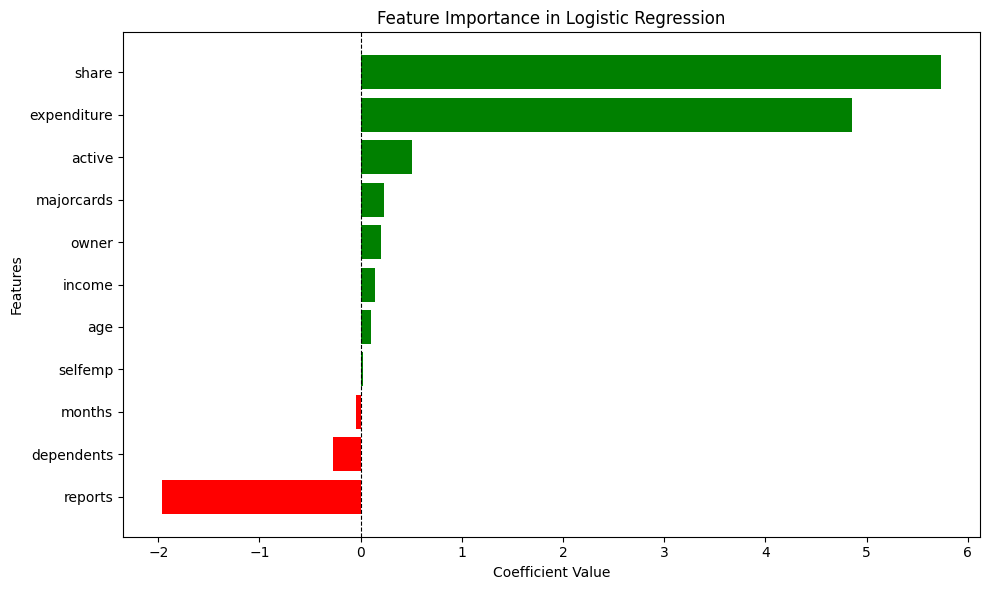

In [43]:
import matplotlib.pyplot as plt

# create a bar chart
plt.figure(figsize=(10, 6))
colors = ['green' if val > 0 else 'red' for val in importance_df['Importance']]
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # reference line at zero
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The model has three most influential variables:

share (coefficient 5.73): the higher the ratio of credit card expenses to annual income, the more likely the application will be approved;
expenditure (4.85): the higher the average monthly credit card expenses, the more likely the client is to be approved;
reports (-1.96): the more negative credit histories the client has, the less likely they are to receive a loan.
Almost no influence on the bank's decision to approve the application:

the client's age;

the number of months he has lived at his current address;
employment or self-employment.